# Problem

Bank gives us a data to study about customers churn.

1. As a Data Scientist in the bank we need to analyze which factors has the most impact in a customer churn
2. Build a prediction model that can classify if a customer is going to churn or not

# Goals

Make the most of the data as possible to get insights and solve existing problems

# Summary information about the features

* Surname          : The surname of the customer
* CreditScore      : The credit score of the customer
* Geography        : The country of the customer(Germany/France/Spain)
* Gender           : The gender of the customer (Female/Male)
* Age              : The age of the customer  
* Tenure           : The customer's number of years in the in the bank 
* Balance          : The customer's account balance
* NumOfProducts    : The number of bank products that the customer uses 
* HasCrCard        : Does the customer has a card? (0=No,1=Yes) 
* IsActiveMember   : Does the customer has an active mebership (0=No,1=Yes) 
* EstimatedSalary  : The estimated salary of the customer
* Exited           : Churned or not? (0=No,1=Yes)

In [1]:
# Import required Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('banks_churn.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
shape = df.shape
print(f'The dataframe consists of {shape[0]} rows of data and {shape[1]} columns')


The dataframe consists of 10000 rows of data and 14 columns


# Check for Missing Values

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
### Berdasarkan data yang kita miliki, Columns: RowNumber dan CustomerID tidak memiliki dampak yang signifikan untuk analisa kita
### Sehingga kita drop
df = df.drop(columns=['RowNumber','CustomerId'], axis=1)

In [8]:
df.shape

(10000, 12)

# Analyze the Categorical and Numerical Columns
### Identify which columns belongs to which type of data

In [9]:
cols = set(df.columns)

In [10]:
cols_numeric = set(['CreditScore','Age', 'Tenure','Balance','NumOfProducts','EstimatedSalary'])
cols_numeric

{'Age', 'Balance', 'CreditScore', 'EstimatedSalary', 'NumOfProducts', 'Tenure'}

In [11]:
cols_obj = set(['Surname'])
cols_obj

{'Surname'}

In [12]:
cols_category = list(cols - cols_numeric - cols_obj)
cols_category

['Exited', 'IsActiveMember', 'Geography', 'Gender', 'HasCrCard']

In [13]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Descriptive Analysis - Univariate (Numerical Columns)

In [14]:
def summary(column_name):
    '''
    Function ini untuk mendescribe data Numerical dan kemudian memvisualisasikannya kedalam bentuk
    distplot, violinplot, boxplot, kdeplot
    '''
    if column_name in cols_numeric:
        x_min = df[column_name].min()
        x_max = df[column_name].max()
        Q1 = df[column_name].quantile(0.25)
        Q2 = df[column_name].quantile(0.50)
        Q3 = df[column_name].quantile(0.75)
        x_mean = df[column_name].mean()
        print(f'6 Point Summary of {column_name.capitalize()} Attribute:\n'
          f'{column_name.capitalize()}(min)   : {x_min}\n'
          f'Q1                      : {Q1}\n'
          f'Q2(Median)              : {Q2}\n'
          f'Q3                      : {Q3}\n'
          f'{column_name.capitalize()}(max)   : {x_max}\n'
          f'{column_name.capitalize()}(mean)  : {round(x_mean)}')
        fig = plt.figure(figsize=(15, 10))
        plt.subplots_adjust(hspace = 0.6)
        sns.set_palette('pastel')
    
        plt.subplot(221)
        ax1 = sns.distplot(df[column_name], color = 'r')
        plt.title(f'{column_name.capitalize()} Density Distribution')
    
        plt.subplot(222)
        ax2 = sns.violinplot(x = df[column_name], palette = 'Accent', split = True)
        plt.title(f'{column_name.capitalize()} Violinplot')
        
        plt.subplot(223)
        ax2 = sns.boxplot(x=df[column_name], palette = 'cool', width=0.7, linewidth=0.6)
        plt.title(f'{column_name.capitalize()} Boxplot')
    
        plt.subplot(224)
        ax3 = sns.kdeplot(df[column_name], cumulative=True)
        plt.title(f'{column_name.capitalize()} Cumulative Density Distribution')
    
        plt.show()
        
    else:
        print("Column Not available in dataframe")

6 Point Summary of Creditscore Attribute:
Creditscore(min)   : 350
Q1                      : 584.0
Q2(Median)              : 652.0
Q3                      : 718.0
Creditscore(max)   : 850
Creditscore(mean)  : 651


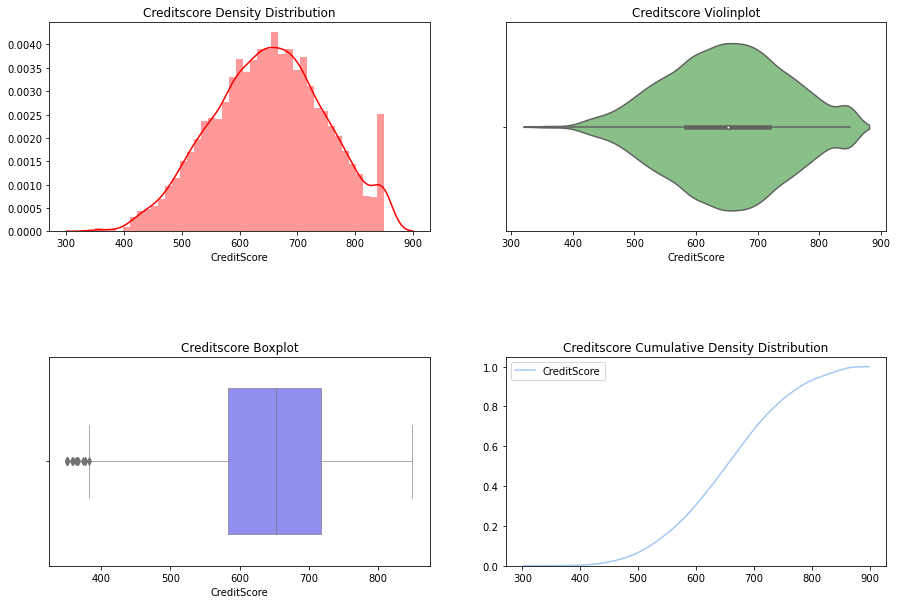

In [15]:
summary('CreditScore')

# Analysis:

Berdasarkan visualisasi data diatas dapat kita lihat bahwa Credit Score tersebar dari range 300-900 dan paling banyak tersebar
di range 600-700

6 Point Summary of Age Attribute:
Age(min)   : 18
Q1                      : 32.0
Q2(Median)              : 37.0
Q3                      : 44.0
Age(max)   : 92
Age(mean)  : 39


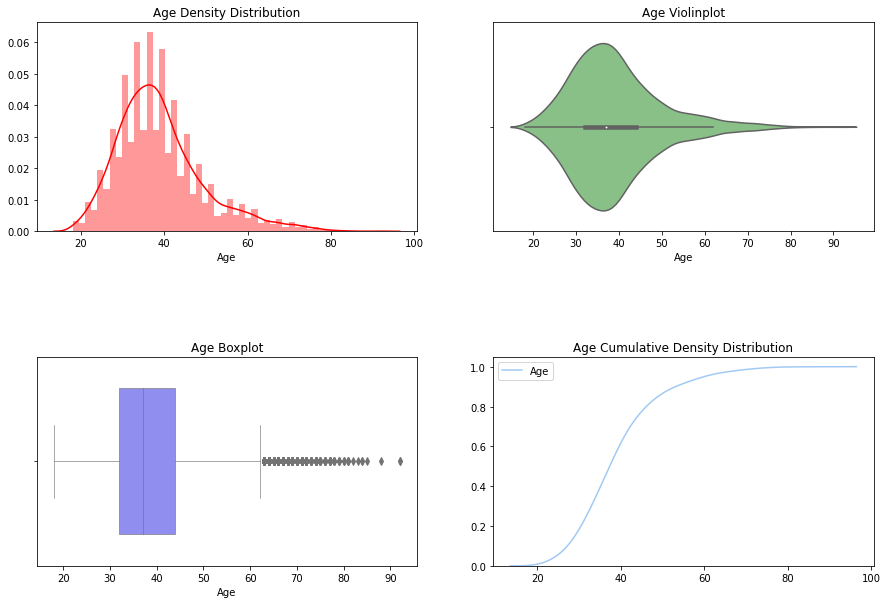

In [16]:
summary('Age')

# Analysis:

Berdasarkan visualisasi data diatas dapat kita lihat bahwa Umur Nasabah tersebar dari range 18-92 dan paling banyak tersebar
di range 30-40

6 Point Summary of Tenure Attribute:
Tenure(min)   : 0
Q1                      : 3.0
Q2(Median)              : 5.0
Q3                      : 7.0
Tenure(max)   : 10
Tenure(mean)  : 5


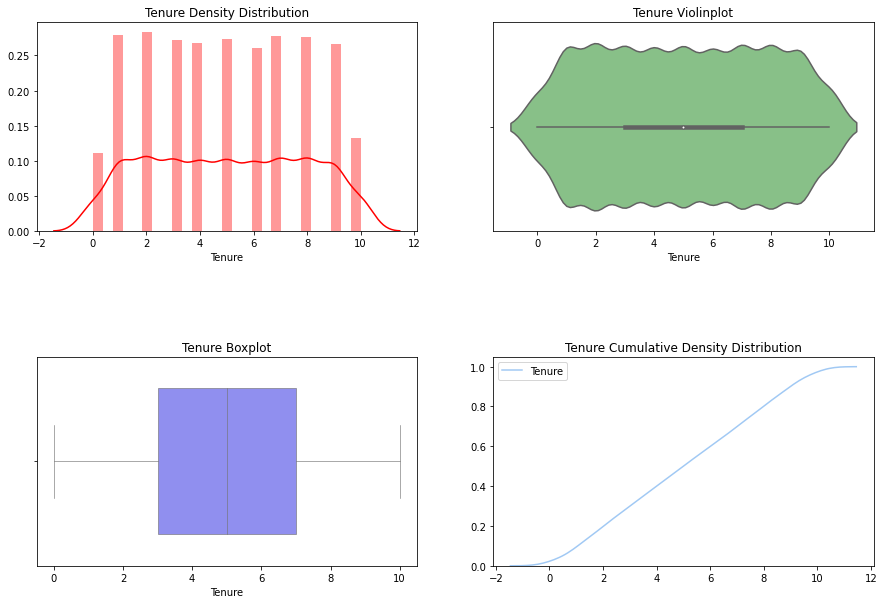

In [17]:
summary('Tenure')

# Analysis:

Berdasarkan visualisasi data diatas dapat kita lihat bahwa Tenur tersebar dari range 0-10 dan paling banyak adalah Tenur 5

6 Point Summary of Balance Attribute:
Balance(min)   : 0.0
Q1                      : 0.0
Q2(Median)              : 97198.54000000001
Q3                      : 127644.24
Balance(max)   : 250898.09
Balance(mean)  : 76486


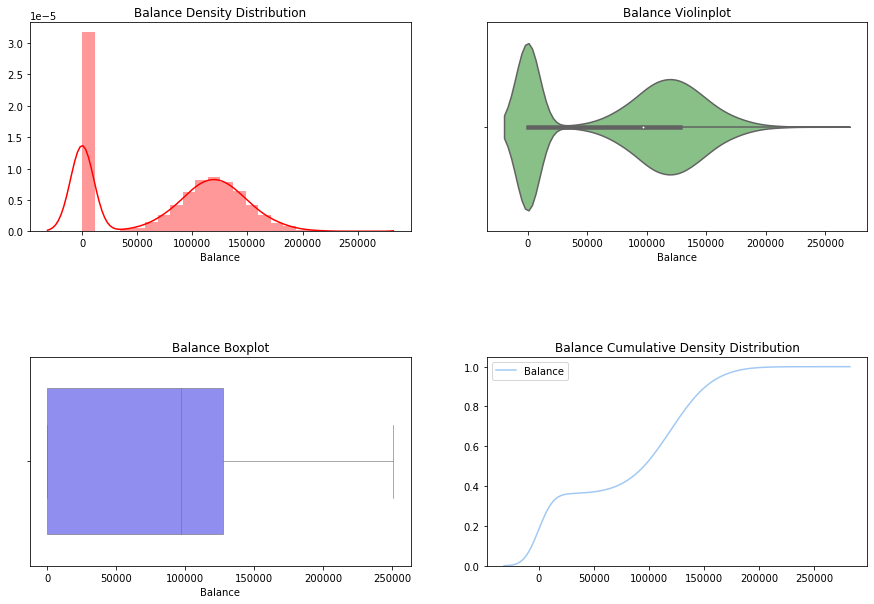

In [18]:
summary('Balance')

# Analysis:

Berdasarkan visualisasi data diatas dapat kita lihat bahwa banyak nasabah yang memiliki balance 0 namun juga banyak pada range 120000-130000

6 Point Summary of Numofproducts Attribute:
Numofproducts(min)   : 1
Q1                      : 1.0
Q2(Median)              : 1.0
Q3                      : 2.0
Numofproducts(max)   : 4
Numofproducts(mean)  : 2


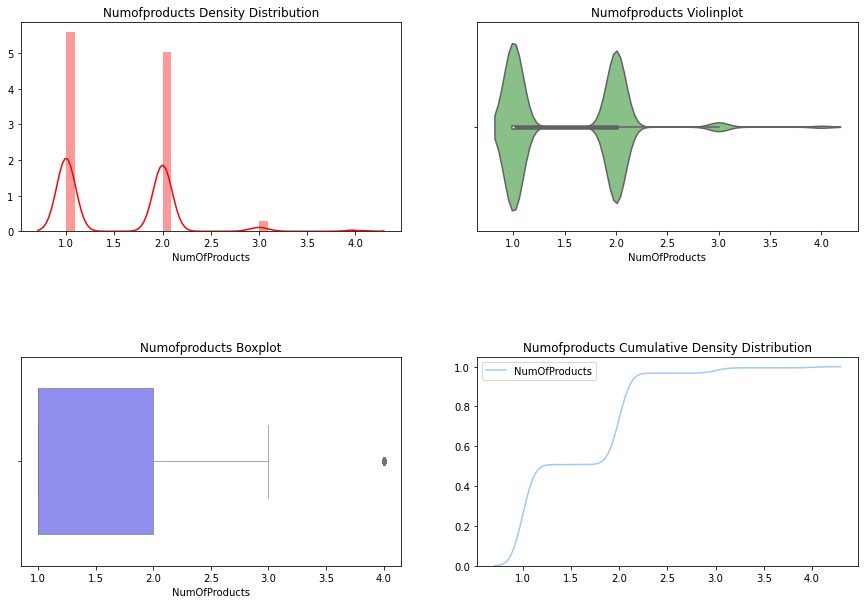

In [19]:
summary('NumOfProducts')

# Analysis:

Berdasarkan visualisasi data diatas dapat kita lihat bahwa banyak nasabah yang memiliki product 1 dan 2

6 Point Summary of Estimatedsalary Attribute:
Estimatedsalary(min)   : 11.58
Q1                      : 51002.11
Q2(Median)              : 100193.915
Q3                      : 149388.2475
Estimatedsalary(max)   : 199992.48
Estimatedsalary(mean)  : 100090


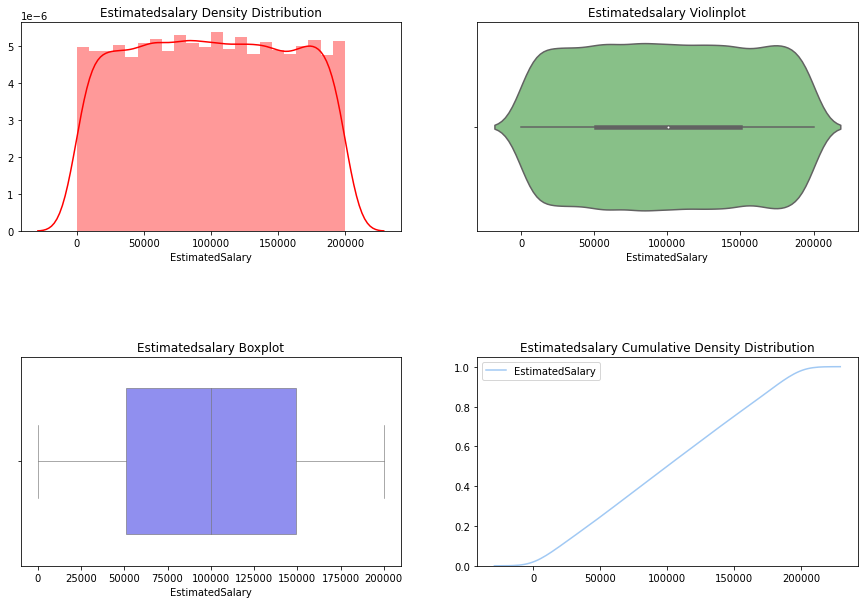

In [20]:
summary('EstimatedSalary')

# Analysis:

Estimated Salary tersebar dari range 12 - 200000

# Descriptive Analysis - Univariate (Numerical Columns)

In [21]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

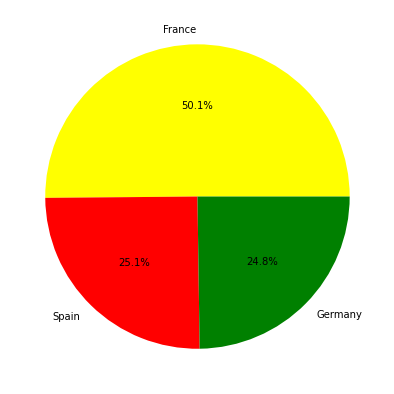

In [23]:
plt.figure(figsize=(7,7))
persentase = df['Geography'].value_counts()
nama = ['France', 'Spain', 'Germany']
plt.pie(persentase, labels=nama,
        colors= ['yellow','red','green'],
        startangle=0,
        textprops = {
            'size' : 10,
            'color' : 'black'
        },
        autopct = '%1.1f%%',
       radius = 1)
plt.show()


# Analysis:

Proporsi Data berdasarkan Negara (Geography)
- 50,1% data adalah Nasabah Warge Negara France
- 25,1% data adalah Nasabah Warge Negara Spain
- 24,8% data adalah Nasabah Warge Negara Germany


In [24]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

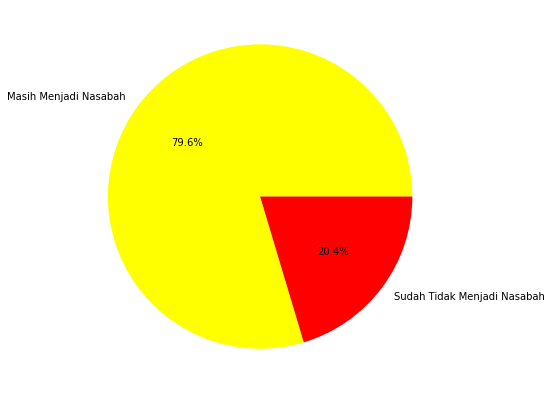

In [25]:
plt.figure(figsize=(7,7))
persentase = df['Exited'].value_counts()
nama = ['Masih Menjadi Nasabah', 'Sudah Tidak Menjadi Nasabah']
plt.pie(persentase, labels=nama,
        colors= ['yellow','red'],
        startangle=0,
        textprops = {
            'size' : 10,
            'color' : 'black'
        },
        autopct = '%1.1f%%',
       radius = 1)
plt.show()

# Analysis:

Proporsi Data berdasarkan kolom Exited
- 79,6% data adalah Nasabah yang TIDAK exit
- 20,4% data adalah Nasabah SUDAH exit

In [26]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

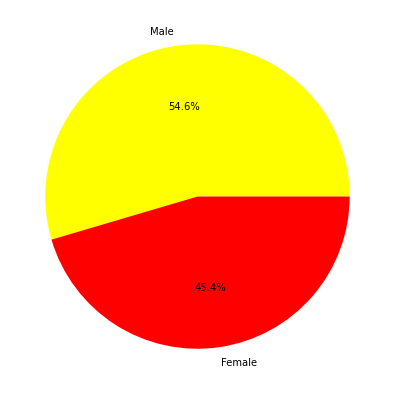

In [27]:
plt.figure(figsize=(7,7))
persentase = df['Gender'].value_counts()
nama = ['Male', 'Female']
plt.pie(persentase, labels=nama,
        colors= ['yellow','red'],
        startangle=0,
        textprops = {
            'size' : 10,
            'color' : 'black'
        },
        autopct = '%1.1f%%',
       radius = 1)
plt.show()

# Analysis:

Proporsi Data berdasarkan Gender
- 54,6% Nasabah adalah laki-laki
- 45,4% Nasabah adalah perempuan

In [28]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

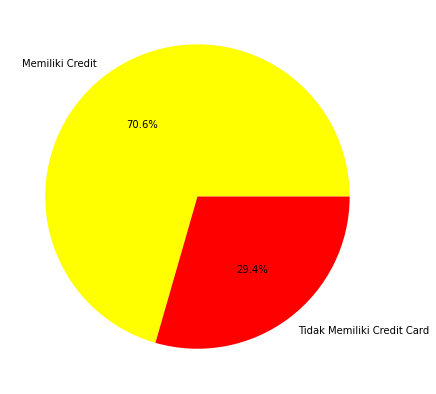

In [29]:
plt.figure(figsize=(7,7))
persentase = df['HasCrCard'].value_counts()
nama = ['Memiliki Credit', 'Tidak Memiliki Credit Card']
plt.pie(persentase, labels=nama,
        colors= ['yellow','red'],
        startangle=0,
        textprops = {
            'size' : 10,
            'color' : 'black'
        },
        autopct = '%1.1f%%',
       radius = 1)
plt.show()

# Analysis:

Proporsi Data berdasarkan Memiliki/Tidak memiliki credit card
- 70,6% Nasabah memiliki credit card
- 29,4% Nasabah tidak memiliki credit card

In [30]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

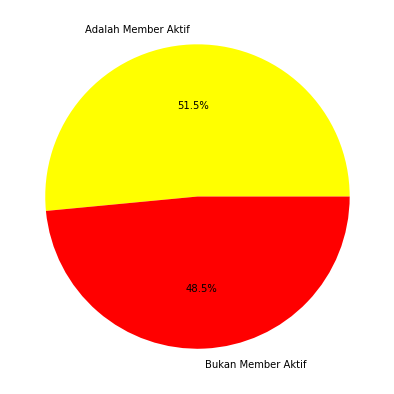

In [31]:
plt.figure(figsize=(7,7))
persentase = df['IsActiveMember'].value_counts()
nama = ['Adalah Member Aktif', 'Bukan Member Aktif']
plt.pie(persentase, labels=nama,
        colors= ['yellow','red'],
        startangle=0,
        textprops = {
            'size' : 10,
            'color' : 'black'
        },
        autopct = '%1.1f%%',
       radius = 1)
plt.show()

# Analysis:

Proporsi Data berdasarkan Member Aktif / Bukan Member Aktif
- 51,5% Nasabah adalah member aktif
- 48,5% Nasabah adalah bukan member aktif

# Bivariate Analysis

### Analyzing gender on each country

In [32]:
result_gender = (pd.crosstab(index=df['Geography'], columns=df['Gender'], normalize='index', margins=True) * 100).round(2)
result_gender

Gender,Female,Male
Geography,,
France,45.09,54.91
Germany,47.55,52.45
Spain,43.96,56.04
All,45.43,54.57


In [33]:
groups_of_country = df['Geography'].unique()
groups_of_country

array(['France', 'Spain', 'Germany'], dtype=object)

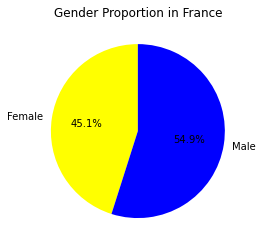

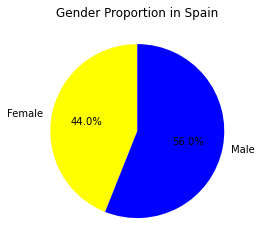

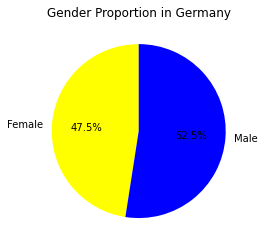

In [34]:
for i in groups_of_country:
    coba = df[df['Geography'] == i]
    result_gen_at_count = df.groupby(by=coba['Gender'])['Gender'].size()
    plt.title(f'Gender Proportion in {i}')
    plt.pie(result_gen_at_count, labels = ['Female', 'Male'], autopct = '%1.1f%%',colors=['Yellow','Blue'], startangle=90)
    plt.show()

# Analysis:

Grafik diatas menunjukkan perbandingan proporsi gender di tiap negara
- Di setiap negara selalu lebih banyak nasabah laki-laki
- Yg paling jauh perbandingannya adalah pada negara Spain.

### Analyzing credit cards on each country

In [35]:
result_cc = (pd.crosstab(index=df['Geography'], columns=df['HasCrCard'], normalize='index', margins=True) * 100).round(2)
result_cc

HasCrCard,0,1
Geography,,
France,29.34,70.66
Germany,28.62,71.38
Spain,30.52,69.48
All,29.45,70.55


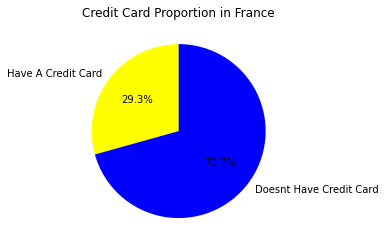

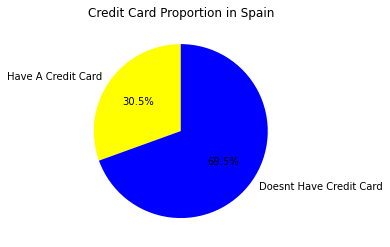

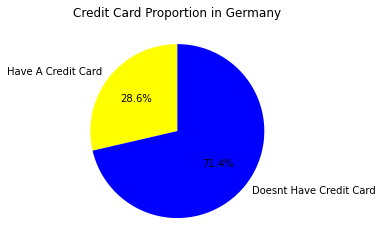

In [36]:
for i in groups_of_country:
    coba = df[df['Geography'] == i]
    result_cc_at_count = df.groupby(by=coba['HasCrCard'])['HasCrCard'].size()
    plt.title(f'Credit Card Proportion in {i}')
    plt.pie(result_cc_at_count, labels = ['Have A Credit Card', 'Doesnt Have Credit Card'], autopct = '%1.1f%%',colors=['Yellow','Blue'], startangle=90)
    plt.show()

# Analysis:

Grafik diatas menunjukkan perbandingan proporsi kepemilikan Credit Card di tiap negara
- Di setiap negara selalu lebih banyak nasabah yang memiliki Credit Card
- Perbandingannya pada setiap negara hampir sama.

In [37]:
result_ex = (pd.crosstab(index=df['Geography'], columns=df['Exited'], normalize='index', margins=True) * 100).round(2)
result_ex

Exited,0,1
Geography,,
France,83.85,16.15
Germany,67.56,32.44
Spain,83.33,16.67
All,79.63,20.37


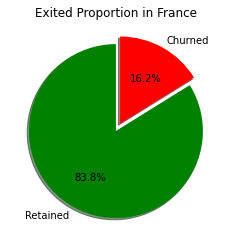

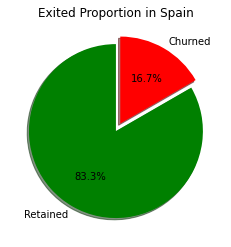

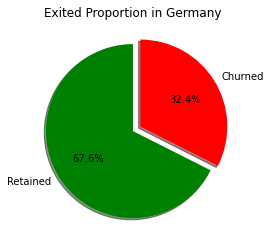

In [38]:
for i in groups_of_country:
    coba = df[df['Geography'] == i]
    result_ex_at_count = df.groupby(by=coba['Exited'])['Exited'].size()
    plt.title(f'Exited Proportion in {i}')
    plt.pie(result_ex_at_count, labels = ['Retained', 'Churned'], autopct = '%1.1f%%',colors=['Green','Red'], startangle=90, explode=(0, 0.1), shadow=True)
    plt.show()

# Analysis:

Grafik diatas menunjukkan perbandingan proporsi nasabah keluar di tiap negara
- Negara dengan jumlah nasabah exit paling banyak adalah pada negara Germany.
Mungkin penyebab hal ini adalah karena di Germany terdapat banyak bank yang lebih terpercaya / memiliki product yang lebih baik daripada bank kita.

In [39]:
result_mem = (pd.crosstab(index=df['Geography'], columns=df['IsActiveMember'], normalize='index', margins=True) * 100).round(2)
result_mem

IsActiveMember,0,1
Geography,,
France,48.32,51.68
Germany,50.26,49.74
Spain,47.03,52.97
All,48.49,51.51


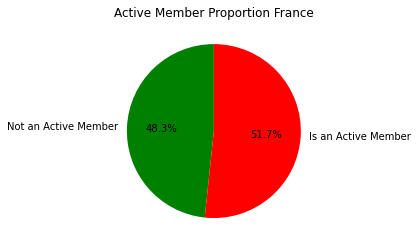

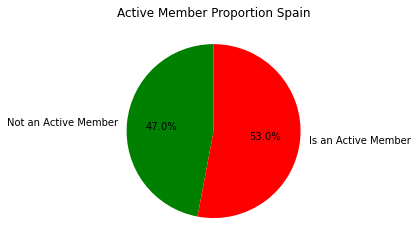

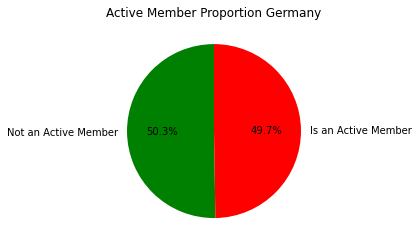

In [40]:
for i in groups_of_country:
    coba = df[df['Geography'] == i]
    result_am_at_count = df.groupby(by=coba['IsActiveMember'])['IsActiveMember'].size()
    plt.title(f'Active Member Proportion {i}')
    plt.pie(result_am_at_count, labels = ['Not an Active Member', 'Is an Active Member'], autopct = '%1.1f%%',colors=['Green','Red'], startangle=90)
    plt.show()

# Analysis:

Grafik diatas menunjukkan perbandingan proporsi nasabah aktif di tiap negara
- Negara dengan proporsi nasabah aktif paling besar adalah pada negara Spain.

### Creating new columns for Bivariate Analysis

In [41]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
#add a new Age Group Column
df['Age_Groups'] = pd.cut(df['Age'],bins=[10,31,36,44,60,95],labels=['18-31_Grp','32-36_Grp','37-44_Grp','45-60_Grp','61-95_Grp'])

In [43]:
def CreditScore_Cat(score):
    if 300 <= score <= 629:
        return 'bad'
    elif 630 <= score <= 689:
        return 'fair'
    elif 690 <= score <= 719:
        return 'good'
    else:
        return 'excellent'

df['CreditScore_Cat'] = df['CreditScore'].apply(CreditScore_Cat)

In [44]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Groups,CreditScore_Cat
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,37-44_Grp,bad
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,37-44_Grp,bad
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,37-44_Grp,bad
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,37-44_Grp,good
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,37-44_Grp,excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,37-44_Grp,excellent
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,32-36_Grp,bad
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,32-36_Grp,good
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,37-44_Grp,excellent


In [45]:
cs = df.groupby(by=df['CreditScore_Cat']).size()

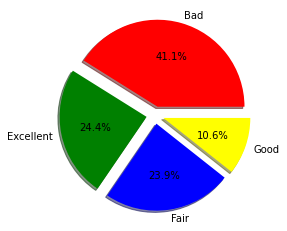

In [46]:
persentase = cs
nama = ['Bad', 'Excellent', 'Fair', 'Good']
plt.pie(persentase, labels=nama,
        colors= ['red','green', 'blue', 'yellow'],
        startangle=0,
        explode=(0.1, 0.1, 0.1, 0.1), 
        shadow=True,
        textprops = {
            'size' : 10,
            'color' : 'black'
        },
        autopct = '%1.1f%%',
       radius = 1)
plt.show()

# Analysis:

Grafik diatas menunjukkan perbandingan proporsi Category Credit Score dari nasabah kita
- Mayoritas Nasabah kita memiliki Credit Score BAD

In [47]:
result_ten = pd.pivot_table(df, index = ['Age_Groups'], columns = ['Gender'], values = ['Tenure'], aggfunc = 'mean')
result_ten

Tenure          
Gender        Female      Male
Age_Groups                    
18-31_Grp   5.033771  5.030628
32-36_Grp   4.851042  5.140172
37-44_Grp   5.047515  5.017825
45-60_Grp   4.896368  5.065957
61-95_Grp   4.929577  4.884462

Text(0, 0.5, 'Average Tenures')

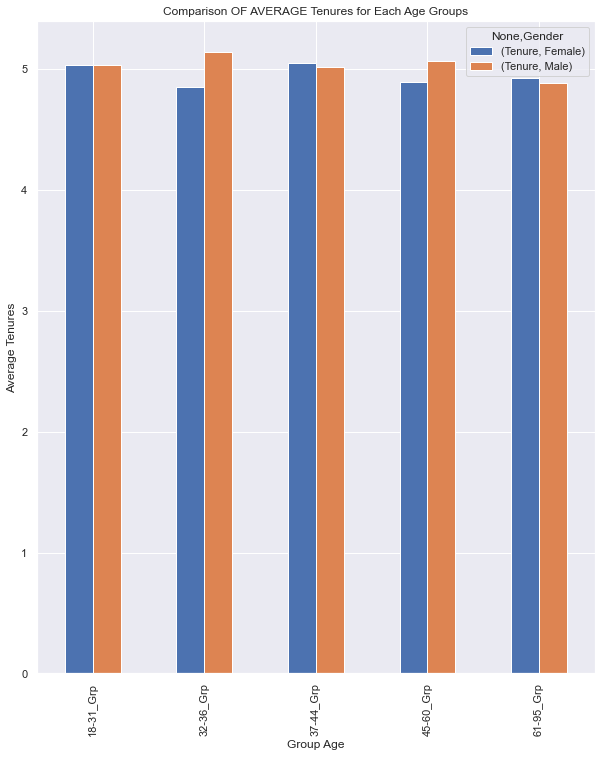

In [48]:
sns.set(rc={'figure.figsize':(10,12)})
bar_ten_distribution = result_ten.plot(kind='bar')
bar_ten_distribution.set_title('Comparison OF AVERAGE Tenures for Each Age Groups')
bar_ten_distribution.set_xlabel('Group Age')
bar_ten_distribution.set_ylabel('Average Tenures')

In [49]:
result_cs = pd.pivot_table(df, index = ['Age_Groups'], columns = ['Gender'], values = ['CreditScore'], aggfunc = 'mean')
result_cs

CreditScore            
Gender          Female        Male
Age_Groups                        
18-31_Grp   648.547842  654.019908
32-36_Grp   652.284375  649.155051
37-44_Grp   654.329678  649.299465
45-60_Grp   646.414530  646.779787
61-95_Grp   652.652582  656.159363

Text(0, 0.5, 'Average Credit Score')

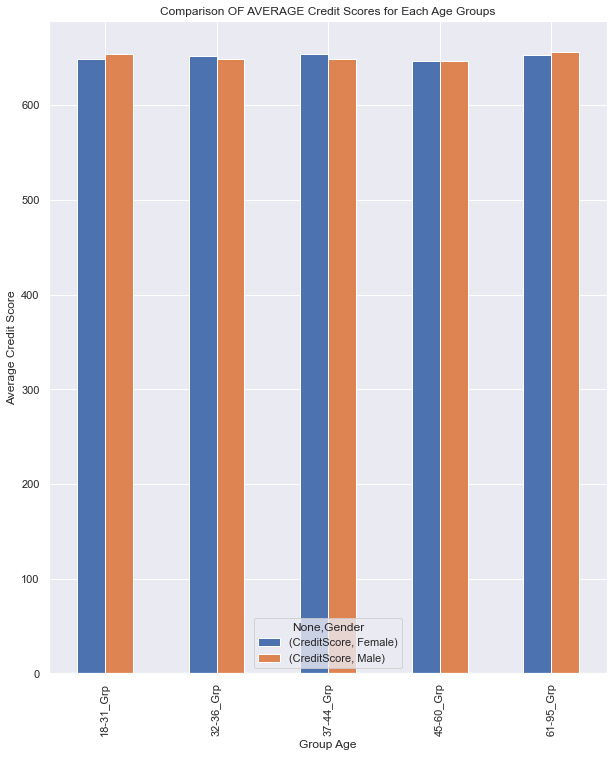

In [50]:
sns.set(rc={'figure.figsize':(10,12)})
bar_cs_distribution = result_cs.plot(kind='bar')
bar_cs_distribution.set_title('Comparison OF AVERAGE Credit Scores for Each Age Groups')
bar_cs_distribution.set_xlabel('Group Age')
bar_cs_distribution.set_ylabel('Average Credit Score')

### Average Credit Score of every Age Groups on every country

In [51]:
df_fr = df[df['Geography'] == 'France']
df_fr

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Groups,CreditScore_Cat
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,37-44_Grp,bad
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,37-44_Grp,bad
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,37-44_Grp,good
6,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,45-60_Grp,excellent
8,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,37-44_Grp,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0,18-31_Grp,excellent
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,37-44_Grp,excellent
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,32-36_Grp,bad
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,32-36_Grp,good


In [52]:
result_cs_fr = pd.pivot_table(df_fr, index = ['Age_Groups'], columns = ['Gender'], values = ['CreditScore'], aggfunc = 'mean')
result_cs_fr

CreditScore            
Gender          Female        Male
Age_Groups                        
18-31_Grp   649.509769  655.675325
32-36_Grp   646.592445  648.672205
37-44_Grp   654.519824  646.439904
45-60_Grp   641.828784  646.228700
61-95_Grp   653.279279  664.733333

In [53]:
df_ger = df[df['Geography'] == 'Germany']
df_ger

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Groups,CreditScore_Cat
7,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,18-31_Grp,bad
15,Goforth,616,Germany,Male,45,3,143129.41,2,0,1,64327.26,0,45-60_Grp,bad
16,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1,45-60_Grp,fair
26,Young,756,Germany,Male,36,2,136815.64,1,1,1,170041.95,0,32-36_Grp,excellent
28,McWilliams,574,Germany,Female,43,3,141349.43,1,1,1,100187.43,0,37-44_Grp,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1,45-60_Grp,fair
9984,Echezonachukwu,602,Germany,Male,35,7,90602.42,2,1,1,51695.41,0,32-36_Grp,bad
9986,Bartlett,673,Germany,Male,47,1,183579.54,2,0,1,34047.54,0,45-60_Grp,fair
9990,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0,32-36_Grp,good


In [54]:
result_cs_ger = pd.pivot_table(df_ger, index = ['Age_Groups'], columns = ['Gender'], values = ['CreditScore'], aggfunc = 'mean')
result_cs_ger

CreditScore            
Gender          Female        Male
Age_Groups                        
18-31_Grp   651.199187  653.534014
32-36_Grp   664.542601  655.546429
37-44_Grp   649.940379  649.391198
45-60_Grp   651.364238  642.637363
61-95_Grp   645.528302  643.716667

In [55]:
df_sp = df[df['Geography'] == 'Spain']
df_sp

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Groups,CreditScore_Cat
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,37-44_Grp,bad
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,37-44_Grp,excellent
5,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,37-44_Grp,fair
11,Andrews,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0,18-31_Grp,bad
14,Scott,635,Spain,Female,35,7,0.00,2,1,1,65951.65,0,32-36_Grp,fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9966,Ch'en,479,Spain,Male,35,4,125920.98,1,1,1,20393.44,0,32-36_Grp,bad
9980,T'ao,741,Spain,Male,35,6,74371.49,1,0,0,99595.67,0,32-36_Grp,excellent
9987,Mancini,606,Spain,Male,30,8,180307.73,2,1,1,1914.41,0,18-31_Grp,bad
9989,McMillan,841,Spain,Male,28,4,0.00,2,1,1,179436.60,0,18-31_Grp,excellent


In [56]:
result_cs_sp = pd.pivot_table(df_sp, index = ['Age_Groups'], columns = ['Gender'], values = ['CreditScore'], aggfunc = 'mean')
result_cs_sp

CreditScore            
Gender          Female        Male
Age_Groups                        
18-31_Grp   643.902724  650.871473
32-36_Grp   652.837607  644.767164
37-44_Grp   659.015723  654.597285
45-60_Grp   647.943723  653.009050
61-95_Grp   658.938776  652.183099

### Average Balance on each Age Groups

In [57]:
result_bl = pd.pivot_table(df, index = ['Age_Groups'], columns = ['Gender'], values = ['Balance'], aggfunc = 'mean')
result_bl

Balance              
Gender            Female          Male
Age_Groups                            
18-31_Grp   72701.073274  74317.941730
32-36_Grp   72188.773385  76545.019452
37-44_Grp   77067.877610  77340.951022
45-60_Grp   80532.585791  82057.832351
61-95_Grp   75645.965117  75824.598247

Text(0, 0.5, 'Average Balances')

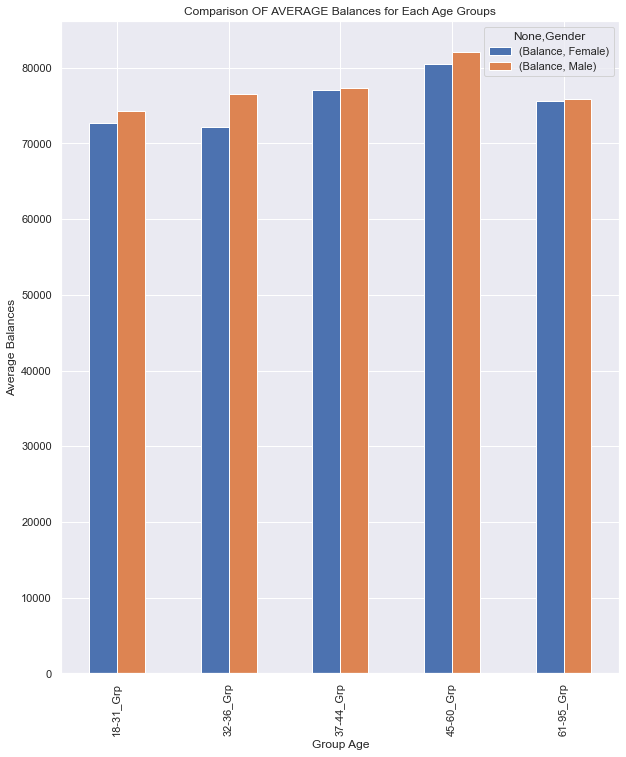

In [58]:
sns.set(rc={'figure.figsize':(10,12)})
bar_bl_distribution = result_bl.plot(kind='bar')
bar_bl_distribution.set_title('Comparison OF AVERAGE Balances for Each Age Groups')
bar_bl_distribution.set_xlabel('Group Age')
bar_bl_distribution.set_ylabel('Average Balances')

In [59]:
result_nop = pd.pivot_table(df, index = ['Age_Groups'], columns = ['Gender'], values = ['NumOfProducts'], aggfunc = 'mean')
result_nop

NumOfProducts          
Gender            Female      Male
Age_Groups                        
18-31_Grp       1.568480  1.542879
32-36_Grp       1.537500  1.523101
37-44_Grp       1.555556  1.535948
45-60_Grp       1.511752  1.453191
61-95_Grp       1.521127  1.498008

Text(0, 0.5, 'Average Number Of Products Owned')

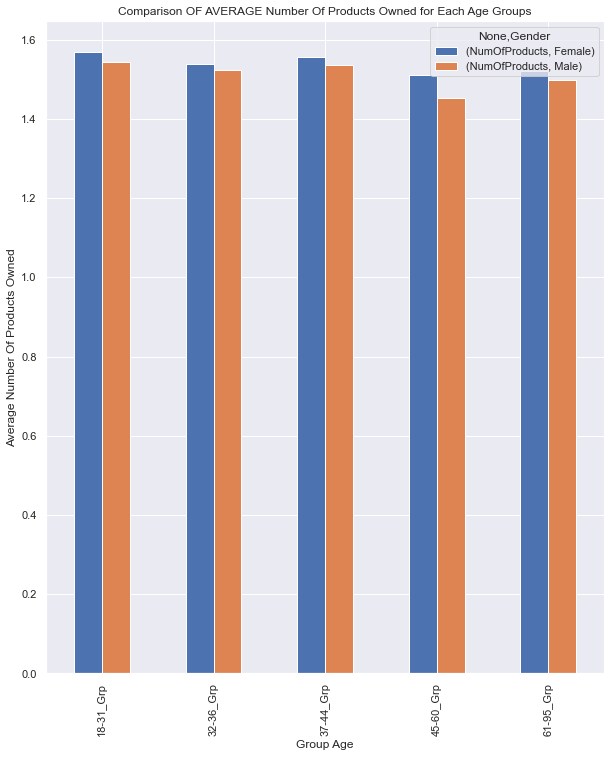

In [60]:
sns.set(rc={'figure.figsize':(10,12)})
bar_nop_distribution = result_nop.plot(kind='bar')
bar_nop_distribution.set_title('Comparison OF AVERAGE Number Of Products Owned for Each Age Groups')
bar_nop_distribution.set_xlabel('Group Age')
bar_nop_distribution.set_ylabel('Average Number Of Products Owned')

In [61]:
result_es = pd.pivot_table(df, index = ['Age_Groups'], columns = ['Gender'], values = ['EstimatedSalary'], aggfunc = np.mean)
result_es

EstimatedSalary               
Gender              Female           Male
Age_Groups                               
18-31_Grp    101561.969015  100116.246516
32-36_Grp     99740.701781   98431.274182
37-44_Grp    100047.427975  100036.148996
45-60_Grp    101042.770128  101175.969064
61-95_Grp    101294.626808   95437.416534

Text(0, 0.5, 'Average Estimated Salary')

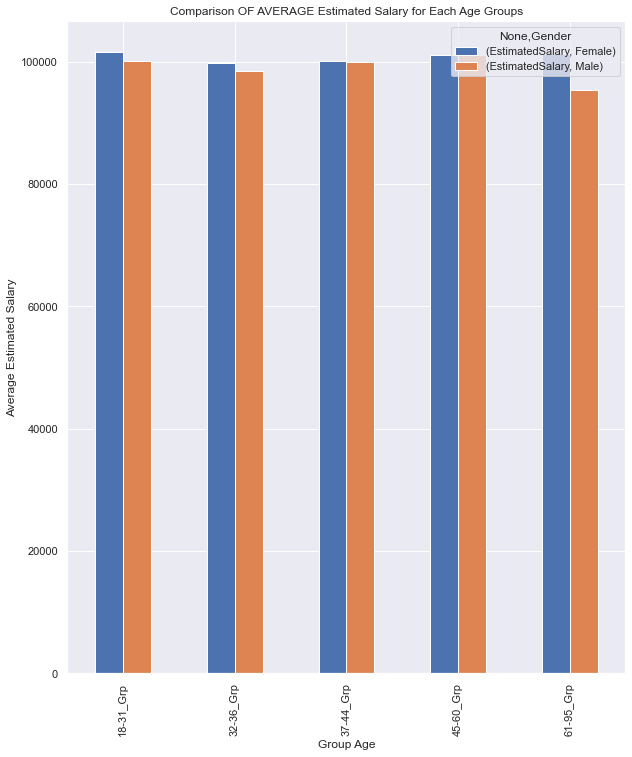

In [62]:
sns.set(rc={'figure.figsize':(10,12)})
bar_es_distribution = result_es.plot(kind='bar')
bar_es_distribution.set_title('Comparison OF AVERAGE Estimated Salary for Each Age Groups')
bar_es_distribution.set_xlabel('Group Age')
bar_es_distribution.set_ylabel('Average Estimated Salary')

# Exploratory Data Analysis

In [63]:
df.dtypes

Surname              object
CreditScore           int64
Geography            object
Gender               object
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
Age_Groups         category
CreditScore_Cat      object
dtype: object

In [64]:
cols_category

['Exited', 'IsActiveMember', 'Geography', 'Gender', 'HasCrCard']

In [65]:
cols_numeric

{'Age', 'Balance', 'CreditScore', 'EstimatedSalary', 'NumOfProducts', 'Tenure'}

In [66]:
exited = df['Exited'].value_counts()

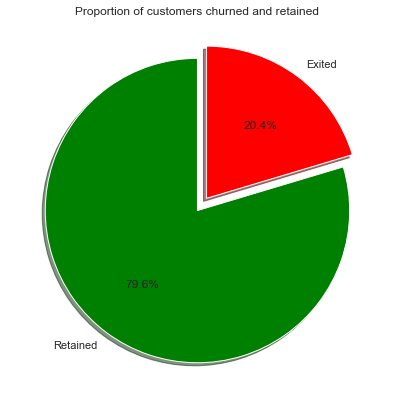

In [67]:
plt.figure(figsize=(7,7))
plt.title('Proportion of customers churned and retained')
plt.pie(exited, labels =['Retained','Exited'], autopct = '%1.1f%%',colors=['Green', 'Red'], explode=(0, 0.1), shadow=True, startangle=90)
plt.show()

Kita dapat melihat bahwa proporsi kolom target (Exited) jelas tidak seimbang. Jadi, kami perlu memastikan model kami dapat memprediksi dengan akurasi tinggi terlepas dari hanya belajar dari kumpulan data yang imbalanced.

# Analysing Each Variable's Relationship with Target Variable

### Categorical Variables

In [68]:
result_geo = df.groupby(by=[df['Exited'], df['Geography']])['Geography'].size().to_frame()
result_geo

Geography
Exited Geography           
0      France          4204
       Germany         1695
       Spain           2064
1      France           810
       Germany          814
       Spain            413

In [69]:
result_gen = df.groupby(by=[df['Exited'], df['Gender']])['Gender'].size().to_frame()
result_gen

Gender
Exited Gender        
0      Female    3404
       Male      4559
1      Female    1139
       Male       898

In [70]:
result_ccard = df.groupby(by=[df['Exited'], df['HasCrCard']])['HasCrCard'].size().to_frame()
result_ccard

HasCrCard
Exited HasCrCard           
0      0               2332
       1               5631
1      0                613
       1               1424

In [71]:
result_am = df.groupby(by=[df['Exited'], df['IsActiveMember']])['IsActiveMember'].size().to_frame()
result_am

IsActiveMember
Exited IsActiveMember                
0      0                         3547
       1                         4416
1      0                         1302
       1                          735

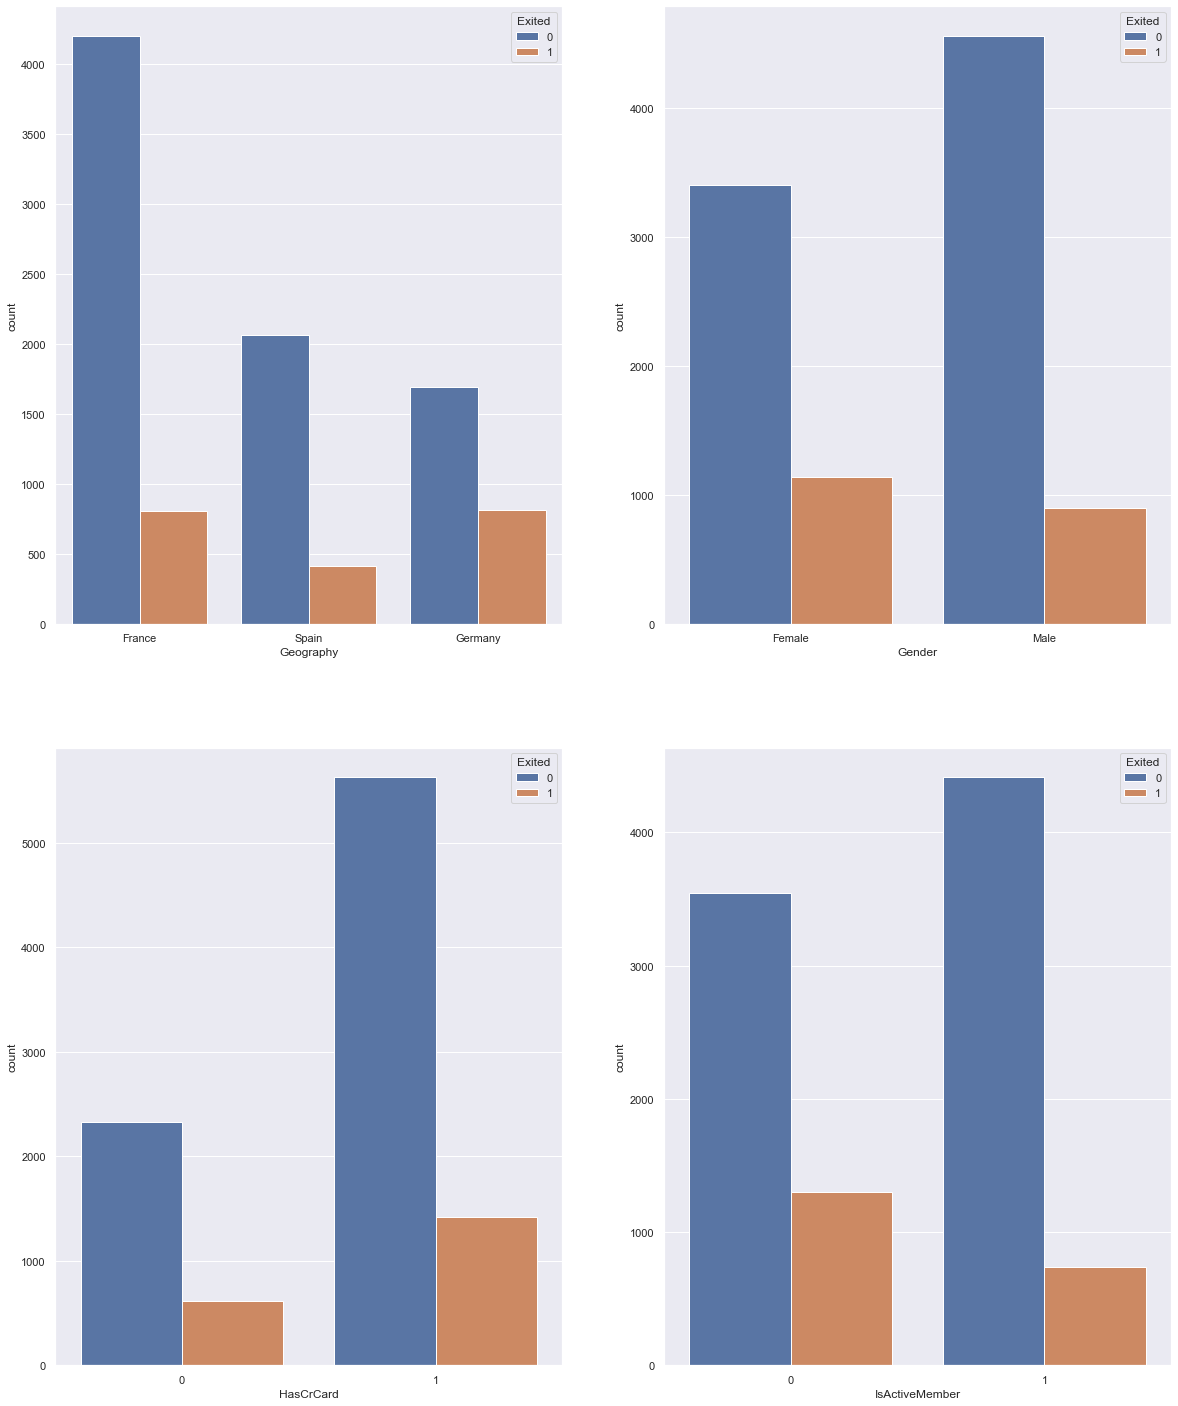

In [72]:
fig, arr = plt.subplots(2, 2, figsize=(20, 25))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=arr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=arr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=arr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=arr[1][1])

### Analysis
- Kita dapat melihat bahwa kebanyakan nasabah bank berasal dari Prancis
- Nasabah yang melakukan perpindahan adalah nasabah Wanita
- Nasabah yang memiliki credit card lebih cenderung untuk churn
- Nasabah yang churn kebanyakan adalah yang bukan member aktif. Kemudian juga kita dapat melihat bahwa terdapat banyak sekali nasabah yang tidak menjadi member aktif. Ini merupakan suatu case yang harus menjadi pertimbangan agar bank lebih dapat menggaet nasabah untuk menjadi member aktif

### Numerical Variables

In [73]:
result_avg_credscore = df.groupby(by=df['Exited'])['CreditScore'].mean().to_frame().round(2)
result_avg_credscore

,CreditScore
Exited,
0,651.85
1,645.35


In [74]:
result_avg_age = df.groupby(by=df['Exited'])['Age'].mean().to_frame().round(2)
result_avg_age

,Age
Exited,
0,37.41
1,44.84


In [75]:
result_avg_tenure = df.groupby(by=df['Exited'])['Tenure'].mean().to_frame().round(2)
result_avg_tenure

,Tenure
Exited,
0,5.03
1,4.93


In [76]:
result_avg_balance = df.groupby(by=df['Exited'])['Balance'].mean().to_frame().round(2)
result_avg_balance

,Balance
Exited,
0,72745.30
1,91108.54


In [77]:
result_avg_nop = df.groupby(by=df['Exited'])['NumOfProducts'].mean().to_frame().round(2)
result_avg_nop

,NumOfProducts
Exited,
0,1.54
1,1.48


In [78]:
result_avg_esalary = df.groupby(by=df['Exited'])['EstimatedSalary'].mean().to_frame().round(2)
result_avg_esalary

,EstimatedSalary
Exited,
0,99738.39
1,101465.68


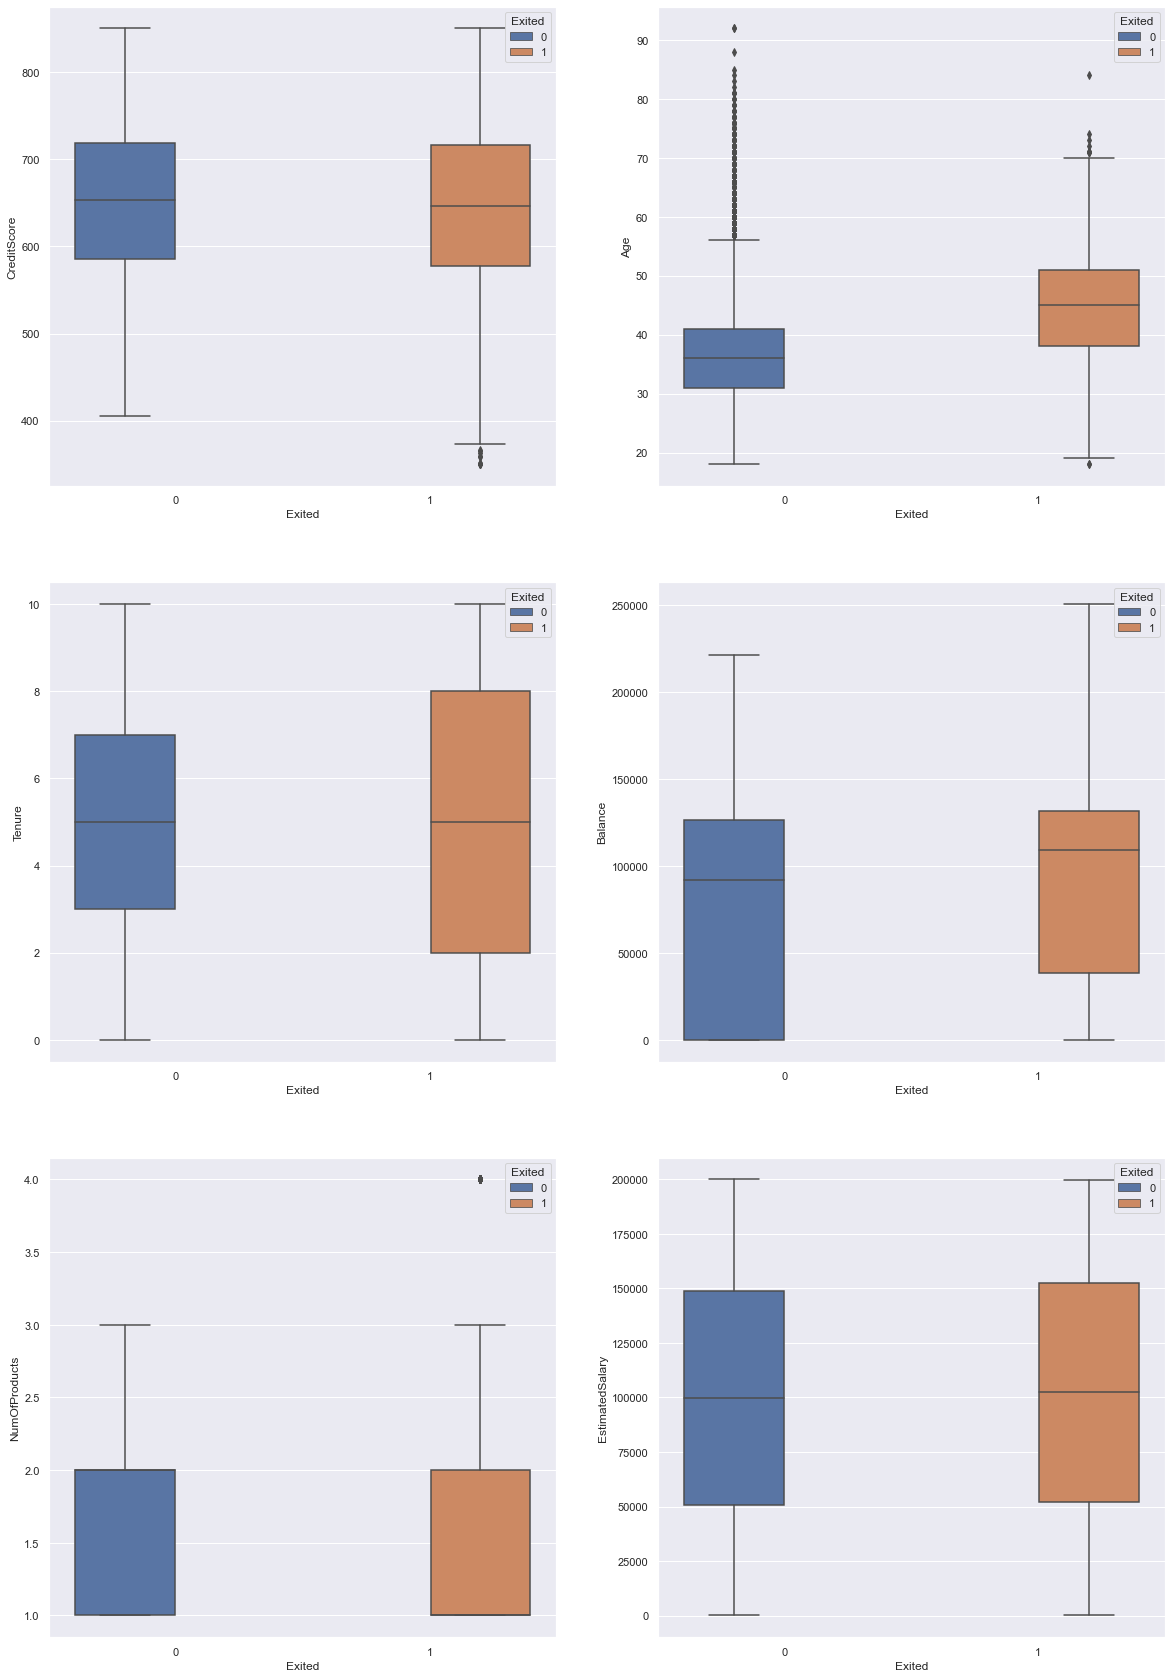

In [79]:
fig, arr = plt.subplots(3, 2, figsize=(20, 30))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=arr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=arr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=arr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=arr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=arr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=arr[2][1])

### Analysis
Tidak ada perbedaan yang signifikan 

# Correlation

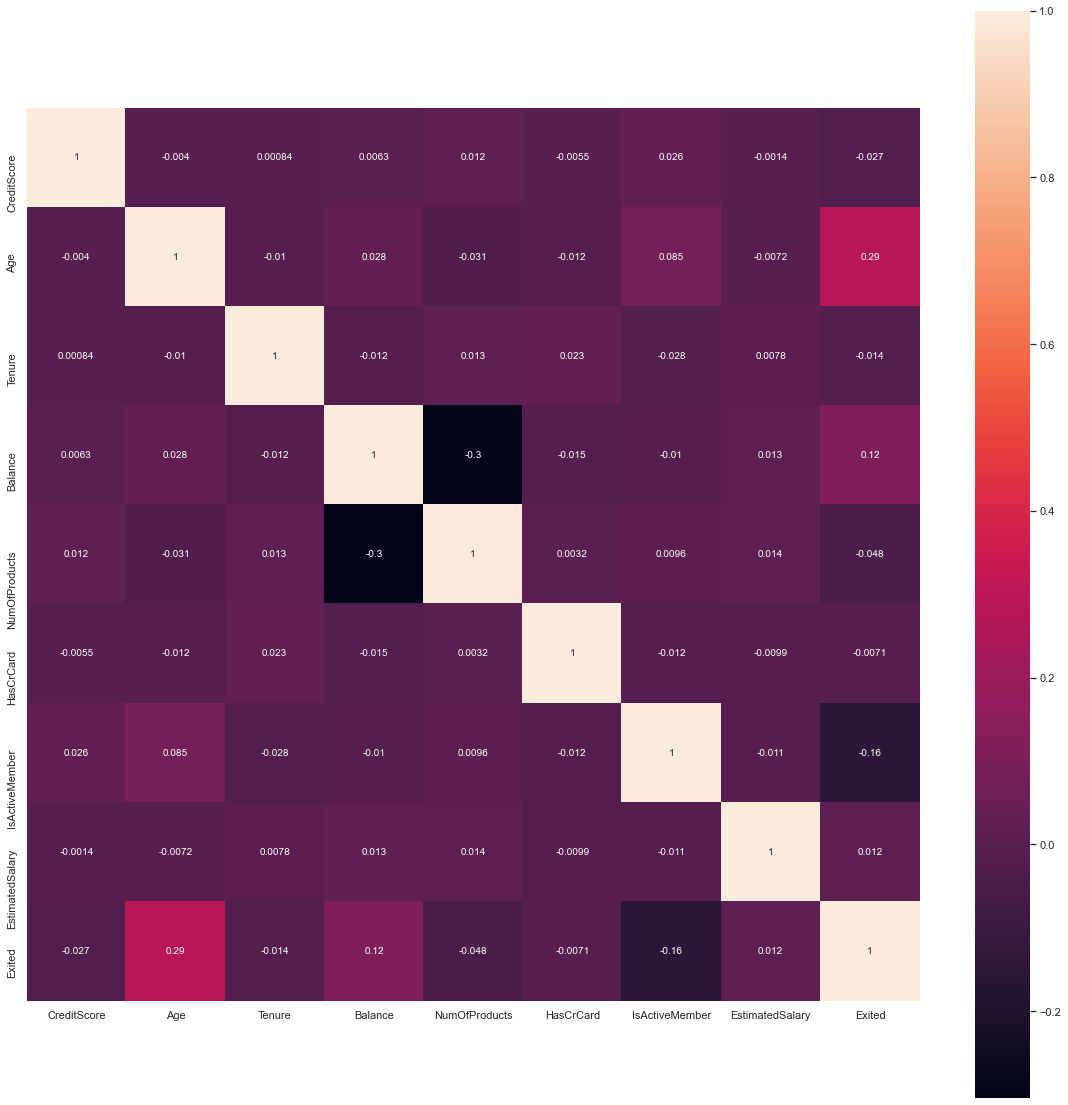

In [80]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, square=True,annot_kws={'size': 10})

In [81]:
high_corr = df.corr()['Exited'].sort_values(ascending=False)
high_corr

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

# Data Preprocessing

In [82]:
df.dtypes

Surname              object
CreditScore           int64
Geography            object
Gender               object
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
Age_Groups         category
CreditScore_Cat      object
dtype: object

### One Hot Encode the categorical variables

In [83]:
cols_category
# We dont need to encode IsActiveMember, HarCrCard and Exited anymore

['Exited', 'IsActiveMember', 'Geography', 'Gender', 'HasCrCard']

In [84]:
dummy_variable_1 = pd.get_dummies(df['Gender'])

In [85]:
dummy_variable_1.rename(columns={'Female' : 'Gender_Female', 'Male' : 'Gender_Male'},inplace = True)
dummy_variable_1

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [86]:
dummy_variable_2 = pd.get_dummies(df['Geography'])

In [87]:
dummy_variable_2.rename(columns={'France' : 'Geography-France', 'Germany' : 'Geography-Germany', 'Spain' : 'Geography-Spain'},inplace = True)
dummy_variable_2

,Geography-France,Geography-Germany,Geography-Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [88]:
# df = df.drop(columns=['Gender_Female', 'Gender_Male', 'Geography-France', 'Geography_Germany', 'Geography_Spain'])

In [89]:
# Concat the encoded variables to the dataframe
df = pd.concat([df, dummy_variable_1, dummy_variable_2], axis=1)
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Groups,CreditScore_Cat,Gender_Female,Gender_Male,Geography-France,Geography-Germany,Geography-Spain
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,37-44_Grp,bad,1,0,1,0,0
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,37-44_Grp,bad,1,0,0,0,1
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,37-44_Grp,bad,1,0,1,0,0
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,37-44_Grp,good,1,0,1,0,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,37-44_Grp,excellent,1,0,0,0,1


### MinMax Scale on the Numerical Variables (y = (x – min) / (max – min))

In [90]:
cols_numeric

{'Age', 'Balance', 'CreditScore', 'EstimatedSalary', 'NumOfProducts', 'Tenure'}

In [91]:
df['CreditScore'] = (df['CreditScore']-df['CreditScore'].min())/(df['CreditScore'].max() - df['CreditScore'].min())
df['Age'] = (df['Age']-df['Age'].min())/(df['Age'].max() - df['Age'].min())
df['Tenure'] = (df['Tenure']-df['Tenure'].min())/(df['Tenure'].max() - df['Tenure'].min())
df['Balance'] = (df['Balance']-df['Balance'].min())/(df['Balance'].max() - df['Balance'].min())
df['NumOfProducts'] =(df['NumOfProducts']-df['NumOfProducts'].min())/(df['NumOfProducts'].max() - df['NumOfProducts'].min())
df['EstimatedSalary'] =(df['EstimatedSalary']-df['EstimatedSalary'].min())/(df['EstimatedSalary'].max() - df['EstimatedSalary'].min())

In [92]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Groups,CreditScore_Cat,Gender_Female,Gender_Male,Geography-France,Geography-Germany,Geography-Spain
0,Hargrave,0.538,France,Female,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,37-44_Grp,bad,1,0,1,0,0
1,Hill,0.516,Spain,Female,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,37-44_Grp,bad,1,0,0,0,1
2,Onio,0.304,France,Female,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,37-44_Grp,bad,1,0,1,0,0
3,Boni,0.698,France,Female,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,37-44_Grp,good,1,0,1,0,0
4,Mitchell,1.000,Spain,Female,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,37-44_Grp,excellent,1,0,0,0,1


In [93]:
# Arrange columns by data type for easier manipulation
numerical_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography-France', 'Geography-Spain', 'Geography-Germany', 'Gender_Male', 'Gender_Female',]
X = df[numerical_vars + cat_vars]
y = df['Exited']
print("shape of x train is" ,X.shape)
print("shape of y train is" ,y.shape)

shape of x train is (10000, 13)
shape of y train is (10000,)


# Splitting The Data

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42,stratify=y,shuffle=True)

print("shape of x train is: ",X_train.shape)
print("shape of y test is-" ,y_test.shape)

shape of x train is:  (8000, 13)
shape of y test is- (2000,)


# Model fitting and selection
Saya akan coba beberapa Algoritma:
* Logistic regression
* SVM
* RandomForest
* XGBoost

In [96]:
# Support Functions
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.model_selection import GridSearchCV

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#timer
import time
from contextlib import contextmanager

@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} done in {:.0f}s".format(title, time.time() - t0))

### Modelling, Evaluation, and Model Tuning

In [97]:
r=42
models = [LogisticRegression(random_state=r),
          SVC(random_state=r,probability=True),
          RandomForestClassifier(random_state=r),
          XGBClassifier(random_state=r)]
names = ["LogisticRegression", "SVC", "Random_Forest", "XGBoost"]

In [126]:
print('Base model validation accuracies for the test data:', end = "\n\n")
for name, model in zip(names, models):
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test) 
    print(name,':',"%.3f" % accuracy_score(y_test, y_pred_test))
    print(classification_report(y_test, y_pred_test), end="\n\n")

Base model validation accuracies for the test data:

LogisticRegression : 0.809
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.60      0.18      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.57      0.58      2000
weighted avg       0.78      0.81      0.77      2000


SVC : 0.832
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1593
           1       0.87      0.21      0.33       407

    accuracy                           0.83      2000
   macro avg       0.85      0.60      0.62      2000
weighted avg       0.84      0.83      0.79      2000


Random_Forest : 0.861
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1593
           1       0.76      0.46      0.57       407

    accuracy                           0.86      2000
   macro avg

# Cross Validation Accuracy of the base models

In [99]:
# kfold_cv = KFold(n_splits=10, random_state=42)
# kfold_cv_results = cross_val_score(RandomForestClassifier(random_state=42), predictors, target, cv=kfold, scoring="accuracy")
# print(kfold_cv_results.mean())

In [100]:
predictors = pd.concat([X_train, X_test])

In [101]:
target = df['Exited']

In [102]:
results = []
print('10 fold Cross validation accuracy and std of the base models for the train data:', end = "\n\n")
for name, model in zip(names, models):
    kfold = KFold(n_splits=10, random_state=1001)
    cv_results = cross_val_score(model, predictors, target, cv = kfold, scoring = "accuracy")
    results.append(cv_results)
    print("{}: {} ({})".format(name, "%.3f" % cv_results.mean() ,"%.3f" %  cv_results.std()))

10 fold Cross validation accuracy and std of the base models for the train data:



C:\Users\Yosafat\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LogisticRegression: 0.796 (0.010)


C:\Users\Yosafat\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


SVC: 0.796 (0.010)


C:\Users\Yosafat\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Random_Forest: 0.795 (0.009)


C:\Users\Yosafat\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


XGBoost: 0.781 (0.013)


# Hyperparameter Tuning using GridSearchCV

In [111]:
# Possible hyper parameters
logreg_params= {"C":np.logspace(-1, 1, 10),
                    "penalty": ["l1","l2"], "solver":['lbfgs', 'liblinear', 'sag', 'saga'], "max_iter":[1000]}

svc_params= {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1, 5, 10 ,50 ,100],
                 "C": [1,10,50,100,200,300,1000]}

rf_params = {"max_features": ["log2","auto","sqrt"],
                "min_samples_split":[2,3,5],
                "min_samples_leaf":[1,3,5],
                "bootstrap":[True,False],
                "n_estimators":[50,100,150],
                "criterion":["gini","entropy"]}

xgb_params ={
        'n_estimators': [50, 100, 200],
        'subsample': [ 0.6, 0.8, 1.0],
        'max_depth': [1,2,3,4],
        'learning_rate': [0.1,0.2, 0.3, 0.4, 0.5],
        "min_samples_split": [1,2,4,6]}


classifier_params = [logreg_params,svc_params,rf_params, xgb_params]          

In [140]:
# Tuning by Cross Validation
cv_result = {}
best_estimators = {}
for name, model,classifier_param in zip(names, models,classifier_params):
    with timer(">Model tuning"):
        clf = GridSearchCV(model, param_grid=classifier_param, cv =10, scoring = "accuracy", n_jobs = -1,verbose = False)
        clf.fit(X_train,y_train)
        cv_result[name]=clf.best_score_
        best_estimators[name]=clf.best_estimator_
        print(name,'cross validation accuracy : %.3f'%cv_result[name])
        
# It shows the best score using the best parameter based on the result of the GridSearchCV 

LogisticRegression cross validation accuracy : 0.812
>Model tuning done in 6s
SVC cross validation accuracy : 0.855
>Model tuning done in 743s
Random_Forest cross validation accuracy : 0.864
>Model tuning done in 301s
[23:03:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBoost cross validation accuracy : 0.866
>Model tuning done in 290s


In [141]:
accuracies={}
print('Validation accuracies of the tuned models for the train data:', end = "\n\n")
for name, model_tuned in zip(best_estimators.keys(),best_estimators.values()):
    y_pred_test_tuned =  model_tuned.fit(X_train,y_train).predict(X_test)
    accuracy=accuracy_score(y_test, y_pred_test_tuned)
    print(name,':', "%.3f" %accuracy)
    print(classification_report(y_test, y_pred_test_tuned), end="\n\n")
    accuracies[name]=accuracy
    
# This part shows the accuracy and classification report of the model after the best parameter is applied to the model

Validation accuracies of the tuned models for the train data:

LogisticRegression : 0.811
SVC : 0.859
Random_Forest : 0.867
[23:04:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBoost : 0.871


# Below is the example of the looongg way on Machine Learning Modelling

In [103]:
model_LogReg = LogisticRegression(random_state=42)

In [104]:
model_LogReg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [105]:
yhat_LogReg = model_LogReg.predict(X_test)
yhat_LogReg

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [121]:
print(accuracy_score(yhat_LogReg, y_test))
print(recall_score(yhat_LogReg, y_test))
print(precision_score(yhat_LogReg, y_test))

0.809
0.6033057851239669
0.17936117936117937


In [106]:
print(classification_report(y_test, yhat_LogReg))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.60      0.18      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.57      0.58      2000
weighted avg       0.78      0.81      0.77      2000



In [107]:
### Hyperparameter Tuning

In [108]:
#kemungkinan param
logreg_params= {"C":np.logspace(-1, 1, 10),
                    "penalty": ["l1","l2"], "solver":['lbfgs', 'liblinear', 'sag', 'saga'], "max_iter":[1000]}

In [109]:
LogReg_tuned = GridSearchCV(model_LogReg, param_grid=logreg_params, cv=10, n_jobs=-1, verbose=True)

In [112]:
LogReg_tuned.fit(X_train, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    8.2s finished


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': array([ 0.1       ,  0.16681005,  0.27825594,  0.46415888,  0.77426368,
        1.29154967,  2.15443469,  3.59381366,  5.9948425 , 10.        ]),
                         'max_iter': [1000], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             verbose=True)

In [113]:
LogReg_tuned.best_estimator_

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', random_state=42,
                   solver='saga')

In [116]:
LogReg_tuned.best_score_

0.81225

In [118]:
LogReg_tuned.best_params_

{'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}

In [119]:
yhat_LogReg_tuned = LogReg_tuned.predict(X_test)

In [129]:
print(accuracy_score(yhat_LogReg_tuned, y_test))
print(recall_score(yhat_LogReg_tuned, y_test))
print(precision_score(yhat_LogReg_tuned, y_test))

0.811
0.638095238095238
0.16461916461916462


In [124]:
print(classification_report(y_test, yhat_LogReg_tuned))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1593
           1       0.64      0.16      0.26       407

    accuracy                           0.81      2000
   macro avg       0.73      0.57      0.58      2000
weighted avg       0.78      0.81      0.76      2000

